# Regionprops / statistics_of_labeled_pixels comparison
With pyclesperanto-prototype, we introduced a GPU-accelerated version of `statistics_of_labeled_pixels` which mimics to some degree scikit-image's `regionprops`. Let's see how they both perform in comparison with each other.

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<GeForce RTX 2070 on Platform: NVIDIA CUDA (1 refs)>

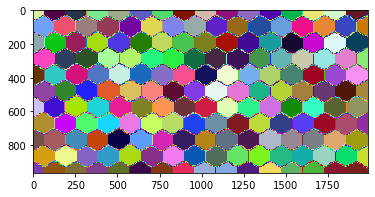

In [2]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

# 2D Measurements using clEsperanto

In [3]:
import time

for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    stats = cle.statistics_of_labelled_pixels(None, labels)

    # read out arrays of values
    area = stats['area']
    mean = stats['mean_intensity']
    std_dev = stats['standard_deviation_intensity']
    centroids = stats['centroid']
    
    print("Determining label statistics using clEsperanto took " + str(time.time() - start_time) + " s")

Determining label statistics using clEsperanto took 0.08988690376281738 s
Determining label statistics using clEsperanto took 0.04124140739440918 s
Determining label statistics using clEsperanto took 0.04013824462890625 s
Determining label statistics using clEsperanto took 0.03957796096801758 s
Determining label statistics using clEsperanto took 0.039153337478637695 s
Determining label statistics using clEsperanto took 0.03899097442626953 s
Determining label statistics using clEsperanto took 0.04288291931152344 s
Determining label statistics using clEsperanto took 0.03936624526977539 s
Determining label statistics using clEsperanto took 0.03934907913208008 s
Determining label statistics using clEsperanto took 0.040511131286621094 s


# 2D Measurements using scikit-image

In [4]:
from skimage.measure import regionprops
import numpy as np

np_labels = cle.pull_zyx(labels).astype(int)

def standard_deviation_intensity(region, intensities):
    return np.std(intensities[region])

extra_properties = [standard_deviation_intensity]

for i in range(0, 10):
    start_time = time.time()
        
    # get regionprops
    stats = regionprops(np_labels, np_labels, cache=True, extra_properties=extra_properties)

    # read out arrays of values
    area = [s.area for s in stats]
    mean = [s.mean_intensity for s in stats]
    std_dev = [s.standard_deviation_intensity for s in stats]
    centroids = [s.centroid for s in stats]
    
    print("Determining label statistics using scikit-image took " + str(time.time() - start_time) + " s")

Determining label statistics using scikit-image took 0.0648508071899414 s
Determining label statistics using scikit-image took 0.06282973289489746 s
Determining label statistics using scikit-image took 0.0618281364440918 s
Determining label statistics using scikit-image took 0.0618283748626709 s
Determining label statistics using scikit-image took 0.06443643569946289 s
Determining label statistics using scikit-image took 0.0648188591003418 s
Determining label statistics using scikit-image took 0.06482243537902832 s
Determining label statistics using scikit-image took 0.061846256256103516 s
Determining label statistics using scikit-image took 0.0668179988861084 s
Determining label statistics using scikit-image took 0.0638430118560791 s


# 3D Measurements

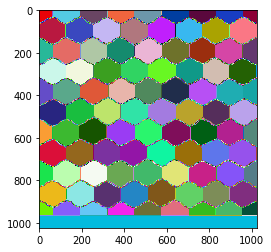

In [5]:
stack = cle.create([128, 1024, 1024])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

# 3D Measurements using clEsperanto

In [6]:
for i in range(0, 10):
    start_time = time.time()
    
    # get dictionary of measurements
    stats = cle.statistics_of_labelled_pixels(None, stack)

    # read out arrays of values
    area = stats['area']
    mean = stats['mean_intensity']
    std_dev = stats['standard_deviation_intensity']
    centroids = stats['centroid']
    
    print("Determining label statistics using clEsperanto took " + str(time.time() - start_time) + " s")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:176: RuntimeWarning: overflow encountered in subtract
  bbox_max_z - bbox_min_z + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:177: RuntimeWarning: overflow encountered in subtract
  bbox_max_y - bbox_min_y + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:178: RuntimeWarning: overflow encountered in subtract
  bbox_max_x - bbox_min_x + 1,
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:180: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_width'] = bbox_max_x - bbox_min_x + 1
c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:181: RuntimeWarning: overflow encountered in subtract
  region_props['bbox_height'] = bbox_max_y 

Determining label statistics using clEsperanto took 0.7790400981903076 s
Determining label statistics using clEsperanto took 0.7683985233306885 s
Determining label statistics using clEsperanto took 0.7662959098815918 s
Determining label statistics using clEsperanto took 0.7706191539764404 s
Determining label statistics using clEsperanto took 0.7659556865692139 s
Determining label statistics using clEsperanto took 0.7647225856781006 s
Determining label statistics using clEsperanto took 0.7653603553771973 s
Determining label statistics using clEsperanto took 0.7649800777435303 s
Determining label statistics using clEsperanto took 0.76381516456604 s
Determining label statistics using clEsperanto took 0.7650163173675537 s


# 3D Measurements using scikit-image

In [7]:
from skimage.measure import regionprops
import numpy as np

np_labels = cle.pull_zyx(stack).astype(int)

def standard_deviation_intensity(region, intensities):
    return np.std(intensities[region])

extra_properties = [standard_deviation_intensity]

for i in range(0, 10):
    start_time = time.time()
    
    # get regionprops
    stats = regionprops(np_labels, np_labels, cache=True, extra_properties=extra_properties)

    # read out arrays of values
    area = [s.area for s in stats]
    mean = [s.mean_intensity for s in stats]
    std_dev = [s.standard_deviation_intensity for s in stats]
    centroids = [s.centroid for s in stats]
    
    print("Determining label statistics using scikit-image took " + str(time.time() - start_time) + " s")

Determining label statistics using scikit-image took 6.918946266174316 s
Determining label statistics using scikit-image took 7.559088706970215 s
Determining label statistics using scikit-image took 7.812996864318848 s
Determining label statistics using scikit-image took 7.861253023147583 s
Determining label statistics using scikit-image took 7.664078950881958 s
Determining label statistics using scikit-image took 7.774170637130737 s
Determining label statistics using scikit-image took 10.638269662857056 s
Determining label statistics using scikit-image took 9.801908254623413 s
Determining label statistics using scikit-image took 9.78780484199524 s
Determining label statistics using scikit-image took 8.547649145126343 s
